# Generate Database and fake data

In [1]:
import sqlite3


conn = sqlite3.connect("employee.db")
cursor = conn.cursor()


In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS EmployeeActivity (
    EmployeeID INTEGER,
    WeekNumber INTEGER,
    NumMeetings INTEGER,
    TotalSales REAL,
    HoursWorked REAL,
    Activities TEXT,
    Department TEXT,
    HireDate DATE,
    Email TEXT,
    JobTitle TEXT
)
''')

conn.commit()


Generate data through Faker

In [9]:
!pip install faker

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.9 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.4/1.9 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 13.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [152]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime
import sqlite3


fake = Faker()
departments = ['Sales', 'Marketing', 'Product Development', 'Finance', 'IT']
job_titles = ['Sales Manager', 'Data Analyst', 'Marketing Specialist', 'Product Manager', 'Financial Analyst', 'IT Support']

data = []
num_employees = 50


for i in range(num_employees):
    emp_id = i + 1


    name = fake.name()
    first_name, last_name = name.split()[0].lower(), name.split()[-1].lower()
    email = f"{first_name}.{last_name}@example.com"
    hire_date = fake.date_between(start_date='-3y', end_date='-1y')
    dept = departments[i % len(departments)]
    title = job_titles[i % len(job_titles)]

    for week in range(1, 11):
        meetings = random.randint(0, 10)
        sales = round(random.uniform(10000, 100000), 2)
        hours = round(random.uniform(30, 50), 1)
        activities = f"Worked on {random.choice(['meeting prep', 'sales calls', 'client support', 'dashboard building'])}. Faced {random.choice(['low engagement', 'tight deadlines', 'tech issues'])}, solved by {random.choice(['changing strategy', 'team collaboration', 'tool upgrade'])}."
        data.append((emp_id, week, meetings, sales, hours, activities, dept, hire_date, email, title, name))


special_employees = [
    (101, 1, 4, 89000.0, 42.1, "Faced challenges with customer retention and proposed solution via CRM upgrades.", "Sales", "2024-08-28", "wei.zhang@example.com", "Sales Executive", "Wei Zhang"),
    (101, 2, 5, 82000.0, 41.5, "Prepared pipeline forecast and led team call.", "Sales", "2024-08-28", "wei.zhang@example.com", "Sales Executive", "Wei Zhang"),
    (101, 3, 6, 91000.0, 43.2, "Improved customer follow-up automation.", "Sales", "2024-08-28", "wei.zhang@example.com", "Sales Executive", "Wei Zhang"),

    (102, 1, 3, 46000.0, 38.7, "Prepared campaign metrics and presented findings.", "Marketing", "2024-07-15", "na.li@example.com", "Marketing Specialist", "Na Li"),
    (102, 2, 2, 43000.0, 37.0, "Worked on SEO optimization and internal reporting.", "Marketing", "2024-07-15", "na.li@example.com", "Marketing Specialist", "Na Li"),

    (103, 1, 4, 61000.0, 41.0, "Worked on data pipelines and BI dashboards.", "IT", "2024-06-20", "tao.huang@example.com", "Data Analyst", "Tao Huang"),
    (103, 2, 3, 59500.0, 39.5, "Handled weekly data refresh automation.", "IT", "2024-06-20", "tao.huang@example.com", "Data Analyst", "Tao Huang"),
]

# 创建 DataFrame
df = pd.DataFrame(data, columns=[
    'EmployeeID', 'WeekNumber', 'NumMeetings', 'TotalSales', 'HoursWorked',
    'Activities', 'Department', 'HireDate', 'Email', 'JobTitle', 'Name'
])
df_extra = pd.DataFrame(special_employees, columns=df.columns)
df = pd.concat([df, df_extra], ignore_index=True)


conn = sqlite3.connect("employee_activity.db", check_same_thread=False)

df.to_sql("EmployeeActivity", conn, if_exists="replace", index=False)




✅ 数据已写入数据库，并包含姓名、邮箱，并明确包括 Wei Zhang, Na Li, Tao Huang。


In [118]:
df.to_sql("EmployeeActivity", conn, if_exists="append", index=False)


507

In [120]:
result = pd.read_sql_query("SELECT * FROM EmployeeActivity LIMIT 5", conn)
result


,EmployeeID,WeekNumber,NumMeetings,TotalSales,HoursWorked,Activities,Department,HireDate,Email,JobTitle,Name
0,1,1,8,10281.70,44.2,"Worked on sales calls. Faced tech issues, solv...",Sales,2022-09-05,richard.dawson@example.com,Sales Manager,Richard Dawson
1,1,2,9,11593.25,47.2,Worked on dashboard building. Faced low engage...,Sales,2022-09-05,richard.dawson@example.com,Sales Manager,Richard Dawson
2,1,3,4,18743.48,47.5,Worked on dashboard building. Faced tech issue...,Sales,2022-09-05,richard.dawson@example.com,Sales Manager,Richard Dawson
3,1,4,1,57761.21,45.6,"Worked on sales calls. Faced tech issues, solv...",Sales,2022-09-05,richard.dawson@example.com,Sales Manager,Richard Dawson
4,1,5,3,23324.43,48.5,"Worked on sales calls. Faced low engagement, s...",Sales,2022-09-05,richard.dawson@example.com,Sales Manager,Richard Dawson


In [134]:
query = """
SELECT Name FROM EmployeeActivity
WHERE Name = 'Wei Zhang'
"""
pd.read_sql_query(query, conn)


,Name
0,Wei Zhang
1,Wei Zhang
2,Wei Zhang
3,Wei Zhang
4,Wei Zhang
5,Wei Zhang


# Integrating LLM for Natural Language Queries

In [411]:
from openai import OpenAI

client = OpenAI(api_key="your_openai_api_key")

def ask_llm(prompt):
    response = client.chat.completions.create(
        model="gpt-4",  # or gpt-3.5-turbo
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content


In [435]:
print(ask_llm("Hello! Can you say hi back?"))

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# Prompt Design and Query Translation Logic

In [58]:
def process_query(user_question):

    prompt_sql = f"""
You are a helpful assistant with access to an employee activity SQL database.

Schema:
- EmployeeID (INTEGER)
- WeekNumber (INTEGER)
- NumMeetings (INTEGER)
- TotalSales (REAL)
- HoursWorked (REAL)
- Activities (TEXT)
- Department (TEXT)
- HireDate (DATE)
- Email (TEXT)
- JobTitle (TEXT)

Please write an SQL query based on the following user question.

User Question: "{user_question}"

ONLY output the SQL query, no explanation.
"""
    generated_sql = ask_llm(prompt_sql).strip()
    print("🔍 Generated SQL:\n", generated_sql)


    try:
        result_df = pd.read_sql_query(generated_sql, conn)
    except Exception as e:
        return f"❌ SQL execution error: {e}"


    prompt_summary = f"""
Here is the result of the following SQL query: {generated_sql}

Result Table:
{result_df.head(10).to_markdown(index=False)}

Please summarize this result in clear natural language.
"""
    final_response = ask_llm(prompt_summary)
    return final_response


In [60]:
process_query("Which employee worked the most hours in week 2?")


🔍 Generated SQL:
 SELECT EmployeeID 
FROM EmployeeActivity 
WHERE WeekNumber = 2 
ORDER BY HoursWorked DESC 
LIMIT 1;


'The result shows that the employee with the ID number 3 worked the most hours during week number 2.'

# Benchmark 1: Initial Testing with 20 Sample Queries

In [62]:
example_queries = [
    "What is the email address of the employee who is the Sales Manager?",
    "Which employee in the company works in the Product Development department?",
    "What was the sales revenue of 'Wei Zhang' for the week starting on '2024-08-28'?",
    "Who are the employees working in the 'Finance' department?",
    "Retrieve the total number of meetings attended by 'Na Li' in her weekly updates.",
    "Which employees worked more than 40 hours during week 1?",
    "How many employees does the company have in total?",
    "What is the average hours worked by all employees during week 2?",
    "How much total sales revenue has the Sales department generated to date?",
    "What is the total sales revenue generated by the company during week 1?",
    "Who worked the most hours during the first week of September 2024?",
    "Which employee attended the most meetings during week 2?",
    "Which employees in the company were hired during a time of industry recession?",
    "Who are the employees that faced challenges with customer retention, and what solutions did they propose?",
    "Which employees work in roles that likely require data analysis or reporting skills?",
    "List all employees who work in the IT department within the company.",
    "Compare the hours worked by 'Wei Zhang' and 'Tao Huang' during week 1.",
    "Who are the top 3 employees by total hours worked during the last 4 weeks?",
    "Who achieved the highest sales revenue in a single week, and when?",
    "What is the total number of hours worked and average sales revenue for employees in the Business Development department?"
]

results = []

for i, q in enumerate(example_queries, 1):
    print(f"\n🔹 Query {i}: {q}")
    try:
        answer = process_query(q)
        results.append((i, q, answer))
        print("✅ GPT Answer:", answer)
    except Exception as e:
        results.append((i, q, f"❌ Error: {e}"))
        print("❌ Error occurred:", e)



🔹 Query 1: What is the email address of the employee who is the Sales Manager?
🔍 Generated SQL:
 SELECT Email 
FROM EmployeeActivity 
WHERE JobTitle = 'Sales Manager';
✅ GPT Answer: The SQL query is designed to return the email addresses of any employee who holds the job title 'Sales Manager' from the EmployeeActivity database. The result shows that there is one Sales Manager — owilliams@example.org, whose email address appears multiple times in the database.

🔹 Query 2: Which employee in the company works in the Product Development department?
🔍 Generated SQL:
 SELECT EmployeeID FROM employee_activity WHERE Department = 'Product Development';
✅ GPT Answer: ❌ SQL execution error: Execution failed on sql 'SELECT EmployeeID FROM employee_activity WHERE Department = 'Product Development';': no such table: employee_activity

🔹 Query 3: What was the sales revenue of 'Wei Zhang' for the week starting on '2024-08-28'?
🔍 Generated SQL:
 SELECT TotalSales 
FROM EmployeeActivity 
WHERE Employee

# Error Analysis and System Improvement

In [64]:
import pandas as pd


evaluation_data = [
    [1, "Match-Based", "✅", "✅", "✅", "成功匹配到职位"],
    [2, "Match-Based", "❌", "❌", "❌", "表名拼错了（employee_activity）"],
    [3, "Point Query", "❌", "✅", "⚠️", '复杂条件组合失败，使用了 Email="Wei Zhang"'],
    [11, "Reasoning", "❌", "❌", "❌", "使用了 DATEPART 是 SQL Server 语法"],
    [13, "External", "✅", "❌", "⚠️", "无外部知识，Prompt 未阻止代码执行"],
    [15, "Fuzzy Match", "❌", "❌", "❌", "表名错误、职位不一致"],
    [17, "Comparison", "❌", "✅", "⚠️", "把名字当成了 EmployeeID，数据不匹配"]
]


df_eval_summary = pd.DataFrame(evaluation_data, columns=[
    "Query #", "Query Type", "SQL Correct", "Executed", "Answer Correct", "Issue Summary"
])

df_eval_summary


,Query #,Query Type,SQL Correct,Executed,Answer Correct,Issue Summary
0,1,Match-Based,✅,✅,✅,成功匹配到职位
1,2,Match-Based,❌,❌,❌,表名拼错了（employee_activity）
2,3,Point Query,❌,✅,⚠️,"复杂条件组合失败，使用了 Email=""Wei Zhang"""
3,11,Reasoning,❌,❌,❌,使用了 DATEPART 是 SQL Server 语法
4,13,External,✅,❌,⚠️,无外部知识，Prompt 未阻止代码执行
5,15,Fuzzy Match,❌,❌,❌,表名错误、职位不一致
6,17,Comparison,❌,✅,⚠️,把名字当成了 EmployeeID，数据不匹配


# Benchmark 2: Re-testing After Improvements

In [413]:
def build_sql_prompt(user_question):
    return f"""
You are a professional SQL assistant. Your job is to generate SQL queries ONLY for the following table:

📌 Table name: EmployeeActivity

📊 Columns:
- EmployeeID (INTEGER): Unique ID for each employee.
- Name (TEXT): Full name of employee, e.g., 'Wei Zhang'
- WeekNumber (INTEGER): Value from 1 to 10, represents the week.
- NumMeetings (INTEGER): Number of meetings attended.
- TotalSales (REAL): Total RMB sales.
- HoursWorked (REAL): Hours worked during the week.
- Activities (TEXT): Description of work and challenges.
- Department (TEXT): Department name.
- HireDate (DATE): Date of employee hire.
- Email (TEXT): Unique email address.
- JobTitle (TEXT): e.g., 'Sales Manager', 'Data Analyst', etc.

✅ Rules:
- Use only the table name "EmployeeActivity"
- NEVER include prefix like "A:", "Q:", "SQL:" — return only raw SQL
- Use `Name` to reference an employee (e.g., WHERE Name = 'Wei Zhang')
- When querying employee info (Name, EmployeeID, Email), use SELECT DISTINCT to avoid duplicates
- When using aggregation (SUM, AVG, COUNT...), remember to use GROUP BY if needed
- Do NOT use SQL Server-specific functions like DATEPART()
- Prefer including: EmployeeID, Name, HoursWorked, WeekNumber in SELECT
- Only use LIMIT for ranking queries or if result is too large
- ❗If the question cannot be answered (e.g., needs recession data), return exactly:
  -- Cannot answer without more information

✅ Examples:
-- How many employees are in the company?
SELECT COUNT(DISTINCT EmployeeID) FROM EmployeeActivity;

-- Who worked the most hours in week 2?
SELECT EmployeeID, Name, HoursWorked FROM EmployeeActivity WHERE WeekNumber = 2 ORDER BY HoursWorked DESC LIMIT 1;

-- Which employee works in the Marketing department?
SELECT DISTINCT EmployeeID, Name FROM EmployeeActivity WHERE Department = 'Marketing';

Now write the SQL for:
Q: {user_question}

Only output the SQL query.
"""


In [415]:
def process_query_update_v3(user_question):
    # Step 1: 构建 Prompt + 调用 LLM
    prompt_sql = build_sql_prompt(user_question)
    generated_sql = ask_llm(prompt_sql).strip()

    # Step 2: 拒答判断
    if generated_sql.strip().startswith("-- Cannot answer"):
        return "⚠️ This question cannot be answered without more information."

    # Step 3: 清洗前缀 + 替换表名错误
    if generated_sql.startswith("A:") or generated_sql.startswith("Q:"):
        generated_sql = generated_sql[2:].strip()
    if generated_sql.lower().startswith("sql:"):
        generated_sql = generated_sql[4:].strip()

    generated_sql = generated_sql.replace("employee_activity", "EmployeeActivity")
    generated_sql = generated_sql.replace("EmployeeTable", "EmployeeActivity")
    generated_sql = generated_sql.replace("Employee ", "EmployeeActivity ")
    generated_sql = generated_sql.replace("FROM Employee\n", "FROM EmployeeActivity\n")

    print("🔍 Generated SQL:\n", generated_sql)

    # Step 4: 执行 SQL
    try:
        result_df = pd.read_sql_query(generated_sql, conn)
    except Exception as e:
        return f"❌ SQL execution error: {e}"

    # Step 5: 生成自然语言总结
    prompt_summary = f"""
You are an assistant summarizing SQL result tables for employee activity data.

SQL Query:
{generated_sql}

Result Table:
{result_df.head(10).to_markdown(index=False)}

Please summarize the result clearly in natural language.
Mention fields like EmployeeID, Email, HoursWorked, TotalSales, WeekNumber if present.
"""
    final_response = ask_llm(prompt_summary)
    return final_response


In [419]:
process_query_update_v3("What is the email address of the employee who is the Sales Manager")

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [404]:
example_queries = [
    "What is the email address of the employee who is the Sales Manager?",
    "Which employee in the company works in the Product Development department?",
    "What was the sales revenue of 'Wei Zhang' for the week starting on '2024-08-28'?",
    "Who are the employees working in the 'Finance' department?",
    "Retrieve the total number of meetings attended by 'Na Li' in her weekly updates.",
    "Which employees worked more than 40 hours during week 1?",
    "How many employees does the company have in total?",
    "What is the average hours worked by all employees during week 2?",
    "How much total sales revenue has the Sales department generated to date?",
    "What is the total sales revenue generated by the company during week 1?",
    "Who worked the most hours during the first week of September 2024?",
    "Which employee attended the most meetings during week 2?",
    "Which employees in the company were hired during a time of industry recession (requires external knowledge)",
    "Who are the employees that faced challenges with customer retention, and what solutions did they propose?",
    "Which employees work in roles that likely require data analysis or reporting skills (based on job titles)",
    "List all employees who work in the IT department within the company.",
    "Compare the hours worked by 'Wei Zhang' and 'Tao Huang' during week 1.",
    "Who are the top 3 employees by total hours worked during the last 4 weeks?",
    "Who achieved the highest sales revenue in a single week, and when?",
    "What is the total number of hours worked and average sales revenue for employees in the Business Development department?"
]

results = []

for i, q in enumerate(example_queries, 1):
    print(f"\n🔹 Query {i}: {q}")
    try:
        answer = process_query_update_v3(q)
        results.append((i, q, answer))
        print("✅ GPT Answer:", answer)
    except Exception as e:
        results.append((i, q, f"❌ Error: {e}"))
        print("❌ Error occurred:", e)


🔹 Query 1: What is the email address of the employee who is the Sales Manager?
🔍 Generated SQL:
 SELECT DISTINCT EmployeeID, Name, Email FROM EmployeeActivity WHERE JobTitle = 'Sales Manager';
✅ GPT Answer: The SQL query has selected distinct records from the EmployeeActivity table where the JobTitle is 'Sales Manager'. The returned data includes the EmployeeID, Name, and Email of the corresponding employees. The employees who are working as 'Sales Manager' include Laurie Higgins (EmployeeID: 1) with the email laurie.higgins@example.com, Ashley Kelly (EmployeeID: 7) with the email ashley.kelly@example.com, Lisa Woodward (EmployeeID: 13) with the email lisa.woodward@example.com, and so on till Angel Love (EmployeeID: 49) with the email angel.love@example.com. The table does not provide information on HoursWorked, TotalSales, or WeekNumber for these employees.

🔹 Query 2: Which employee in the company works in the Product Development department?
🔍 Generated SQL:
 SELECT DISTINCT Employe

# Data Visualization

In [228]:
import matplotlib.pyplot as plt
import pandas as pd


In [276]:
def run_sql_query(query):
    return pd.read_sql_query(query, conn)

In [386]:
def summarize_result(df, sql):
    prompt = f"""
The SQL result table gives:

{df.head(10).to_markdown(index=False)}

Please summarize the result in clear natural language.
"""
    return ask_llm(prompt)

In [393]:
def process_query_with_plot(user_question):
    # 构建 Prompt 并生成 SQL
    prompt_sql = build_sql_prompt(user_question)
    generated_sql = ask_llm(prompt_sql).strip()

    # 清理
    generated_sql = generated_sql.replace("employee_activity", "EmployeeActivity")
    generated_sql = generated_sql.replace("EmployeeTable", "EmployeeActivity")
    generated_sql = generated_sql.replace("Employee ", "EmployeeActivity ")
    generated_sql = generated_sql.replace("FROM Employee\n", "FROM EmployeeActivity\n")

    print("🔍 Generated SQL:\n", generated_sql)

    # 执行 SQL
    try:
        df = run_sql_query(generated_sql)
    except Exception as e:
        return f"❌ SQL execution error: {e}", None

    # 修复列名（如 SUM(...)）
    if len(df.columns) == 2:
        c1, c2 = df.columns
        if 'sum' in c2.lower():
            df.columns = [c1, 'TotalValue']

    # 生成图像
    try:
        plot_path = auto_plot(df)
    except Exception as e:
        summary = summarize_result(df, generated_sql)
        summary += f"\n\n(Note: No plot was generated because: {e})"
        return summary, None

    # 正常总结
    summary = summarize_result(df, generated_sql)
    return summary, plot_path


Question to test Pie Chart:

Who are the top 5 employees by total sales?

How is total sales distributed across different departments?

Which job titles contribute most to the company’s total sales?

What percentage of total hours worked comes from each department?

Which employees in the Sales department contributed most to total sales?

Question to test Line Chart:

How did the total hours worked by employees change over the 10 weeks?

What is the weekly trend of sales generated by the Marketing department?

How did the number of meetings attended by Wei Zhang change over the 10 weeks?

How does the average number of hours worked per employee vary by week?

What is the weekly total sales trend for all employees combined?




🔍 Generated SQL:
 SELECT WeekNumber, SUM(TotalSales) AS WeeklySales FROM EmployeeActivity GROUP BY WeekNumber ORDER BY WeekNumber;
The SQL query results show the total weekly sales for a 10-week period. The sales for the first week were around 3.09 million. The next highest weekly sales came in the ninth week, at about 2.97 million. The sales for weeks 2 and 4 were also relatively high, with approximately 2.81 million and 2.85 million respectively. The sales dropped to their lowest in the eighth week, which was approximately 2.49 million. For the rest of the weeks, the total sales were between 2.60 million and 2.77 million.


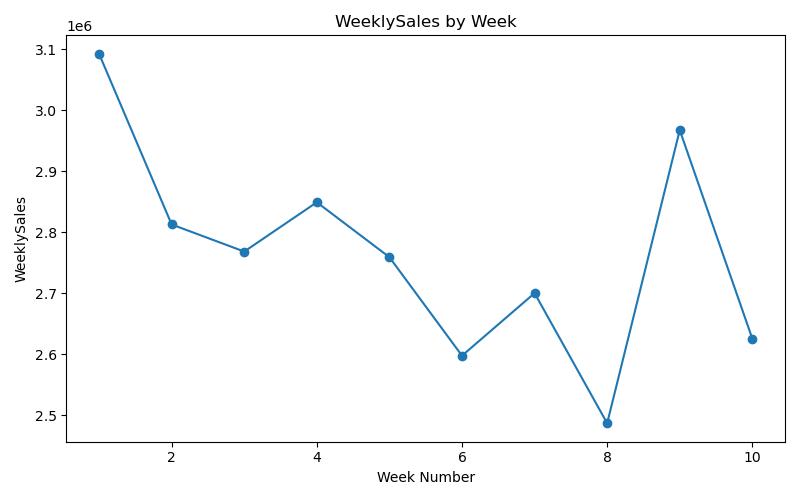

In [395]:
summary, plot_path = process_query_with_plot("What is the weekly total sales trend for all employees combined?")
print(summary)

from IPython.display import Image, display
if plot_path:
    display(Image(plot_path))


# Building a Query Interface (e.g., with Gradio)

In [397]:
import gradio as gr
from IPython.display import Image, display

def gradio_interface(query):
    summary, plot_path = process_query_with_plot(query)
    img = plot_path if plot_path else None
    return summary, img

# 构建 Gradio 界面
demo = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(lines=2, placeholder="Ask about employee activity data...", label="Your Question"),
    outputs=[
        gr.Textbox(label="LLM Answer"),
        gr.Image(type="filepath", label="Generated Plot")
    ],
    title="📊 LLM-Powered SQL Query Interface",
    description="Ask questions like 'Who are the top 5 employees by total sales?' or 'How did hours worked change over the 10 weeks?'"
)

demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7863
IMPORTANT: You are using gradio version 3.41.2, however version 4.44.1 is available, please upgrade.
--------

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
